# Análise bivariada

In [2]:
#importa pacote
library('readr')

Warning message:
"package 'readr' was built under R version 3.6.3"

In [3]:
# Lê/coleta dados no arquivo

dados_cliente <- read.csv("./clientes.csv",sep=";")

In [4]:
head(dados_cliente)

Id,Estado.civil,Grau.Instrução,Qtde.Filhos,Salário,Anos,anos_trabalho,UF
1,solteiro,Fundamental,NA,1100,26,3,MG
2,casado,Doutorado,1,13000,32,7,RJ
3,casado,Fundamental,2,1100,36,5,SP
4,solteiro,Médio,NA,2500,30,10,RS
5,solteiro,Fundamental,NA,2000,40,7,SC
6,casado,Fundamental,1,2600,28,0,SP


In [6]:
# Definimos que a variável Grau.Instrução deve ser tratada como ordinal

levels(dados_cliente$Grau.Instrução)

[1] "Doutorado"   "Fundamental" "Médio"       "Mestrado"    "Superior"

In [7]:
dados_cliente$Grau.Instrução <- factor(dados_cliente$Grau.Instrução,
                                       levels = c('Fundamental','Médio','Superior','Mestrado','Doutorado'))

In [41]:
levels(dados_cliente$Grau.Instrução)

[1] "Fundamental" "Médio"       "Superior"    "Mestrado"    "Doutorado"

## qualitativas x qualitativas

In [43]:
# Frequência absoluta

fa <- with(dados_cliente,table(Estado.civil,Grau.Instrução))
fa


            Grau.Instrução
Estado.civil Fundamental Médio Superior Mestrado Doutorado
    casado             4     8        4        2         2
    solteiro           7     5        3        0         1

In [44]:
# Frequência relativa
# Em relação ao total geral
# Em relação aos totais por linha (`margin = 1`)
# Em relação aos totais por coluna (`margin = 2`)

frg <- prop.table(fa)
round(frg,digit=2)

frl <- prop.table(fa,margin=1)
round(frl,digit=2)

frc <- prop.table(fa,margin=2)
round(frc,digit=2)


            Grau.Instrução
Estado.civil Fundamental Médio Superior Mestrado Doutorado
    casado          0.11  0.22     0.11     0.06      0.06
    solteiro        0.19  0.14     0.08     0.00      0.03

            Grau.Instrução
Estado.civil Fundamental Médio Superior Mestrado Doutorado
    casado          0.20  0.40     0.20     0.10      0.10
    solteiro        0.44  0.31     0.19     0.00      0.06

            Grau.Instrução
Estado.civil Fundamental Médio Superior Mestrado Doutorado
    casado          0.36  0.62     0.57     1.00      0.67
    solteiro        0.64  0.38     0.43     0.00      0.33

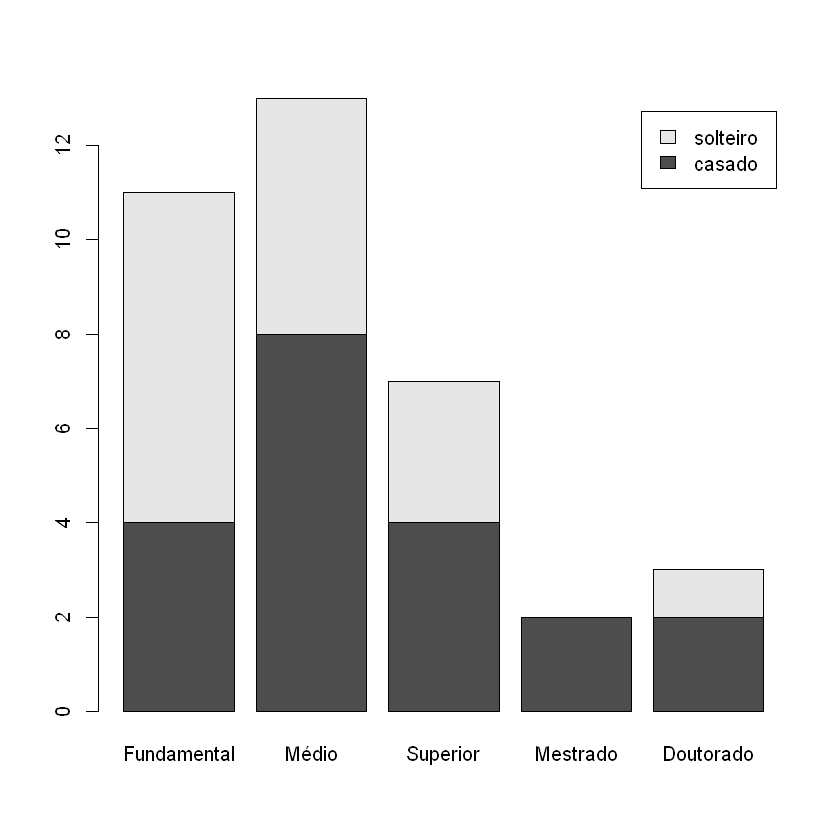

In [11]:
barplot(fa, legend = TRUE)

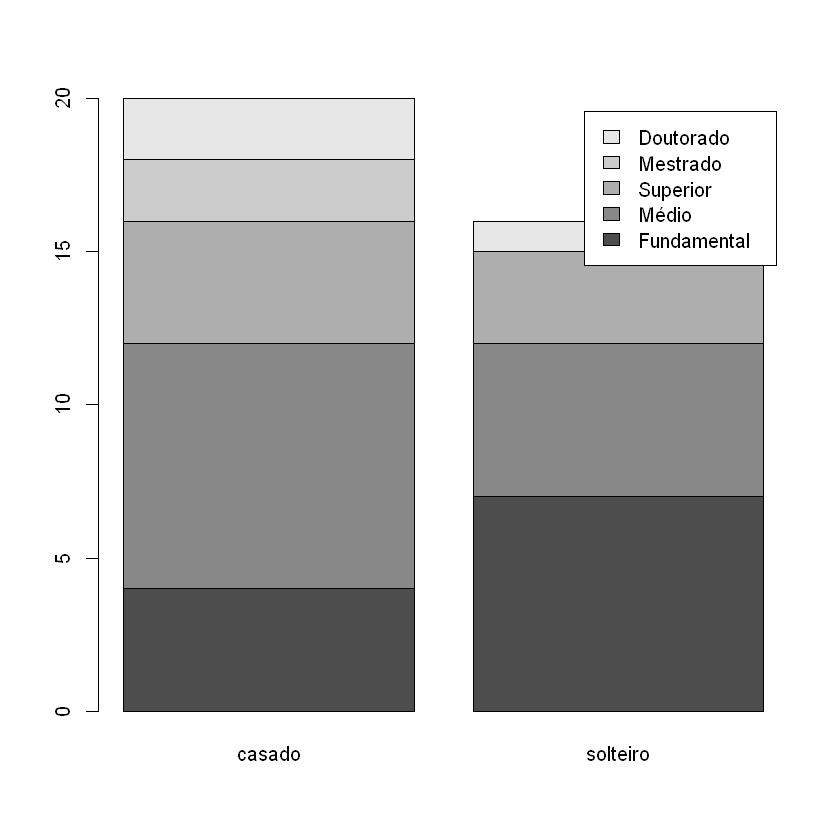

In [12]:
barplot(t(fa), legend = TRUE)


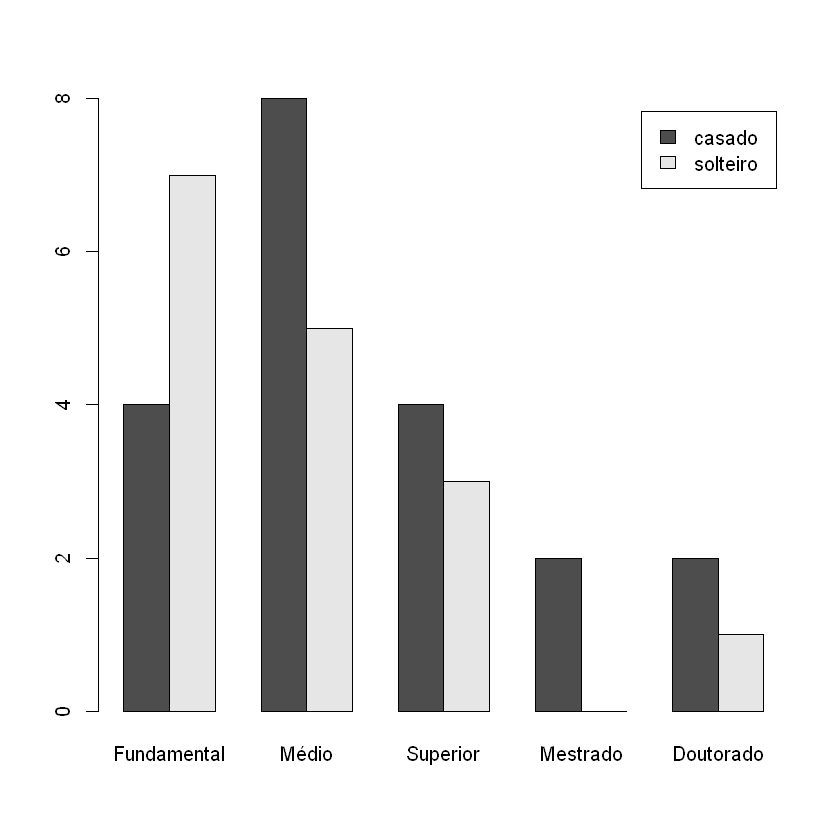

In [13]:
barplot(fa, beside = TRUE, legend = TRUE)


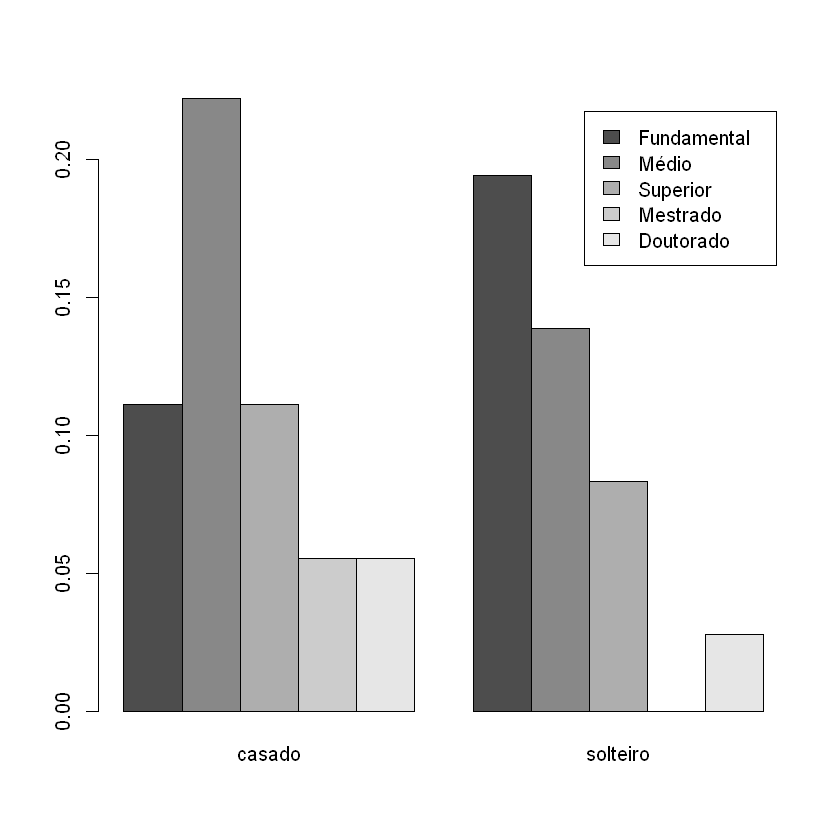

In [14]:
barplot(t(prop.table(fa)), beside = TRUE, legend = TRUE)

## Qualitativa x quantitativa

In [18]:
## Quartis de salario
quantile(dados_cliente$Salário)

## Classificação de acordo com os quartis
grupo_sal <- cut(dados_cliente$Salário, breaks =  quantile(dados_cliente$Salário),include.lowest = TRUE)



0%      25%      50%      75%     100% 
  147.00  1145.75  2165.00  4095.00 16000.00

In [19]:
## Tabela de frequências absolutas
fa <- table(dados_cliente$Grau.Instrução, grupo_sal)
fa


             grupo_sal
              [147,1.15e+03] (1.15e+03,2.16e+03] (2.16e+03,4.1e+03]
  Fundamental              4                   6                  1
  Médio                    2                   3                  7
  Superior                 2                   0                  1
  Mestrado                 1                   0                  0
  Doutorado                0                   0                  0
             grupo_sal
              (4.1e+03,1.6e+04]
  Fundamental                 0
  Médio                       1
  Superior                    4
  Mestrado                    1
  Doutorado                   3

In [20]:
frg <- prop.table(fa)
frg

frl <- prop.table(fa,margin=1)
frl

frc <- prop.table(fa,margin=2)
frc


             grupo_sal
              [147,1.15e+03] (1.15e+03,2.16e+03] (2.16e+03,4.1e+03]
  Fundamental     0.11111111          0.16666667         0.02777778
  Médio           0.05555556          0.08333333         0.19444444
  Superior        0.05555556          0.00000000         0.02777778
  Mestrado        0.02777778          0.00000000         0.00000000
  Doutorado       0.00000000          0.00000000         0.00000000
             grupo_sal
              (4.1e+03,1.6e+04]
  Fundamental        0.00000000
  Médio              0.02777778
  Superior           0.11111111
  Mestrado           0.02777778
  Doutorado          0.08333333

             grupo_sal
              [147,1.15e+03] (1.15e+03,2.16e+03] (2.16e+03,4.1e+03]
  Fundamental     0.36363636          0.54545455         0.09090909
  Médio           0.15384615          0.23076923         0.53846154
  Superior        0.28571429          0.00000000         0.14285714
  Mestrado        0.50000000          0.00000000         0.00000000
  Doutorado       0.00000000          0.00000000         0.00000000
             grupo_sal
              (4.1e+03,1.6e+04]
  Fundamental        0.00000000
  Médio              0.07692308
  Superior           0.57142857
  Mestrado           0.50000000
  Doutorado          1.00000000

             grupo_sal
              [147,1.15e+03] (1.15e+03,2.16e+03] (2.16e+03,4.1e+03]
  Fundamental      0.4444444           0.6666667          0.1111111
  Médio            0.2222222           0.3333333          0.7777778
  Superior         0.2222222           0.0000000          0.1111111
  Mestrado         0.1111111           0.0000000          0.0000000
  Doutorado        0.0000000           0.0000000          0.0000000
             grupo_sal
              (4.1e+03,1.6e+04]
  Fundamental         0.0000000
  Médio               0.1111111
  Superior            0.4444444
  Mestrado            0.1111111
  Doutorado           0.3333333

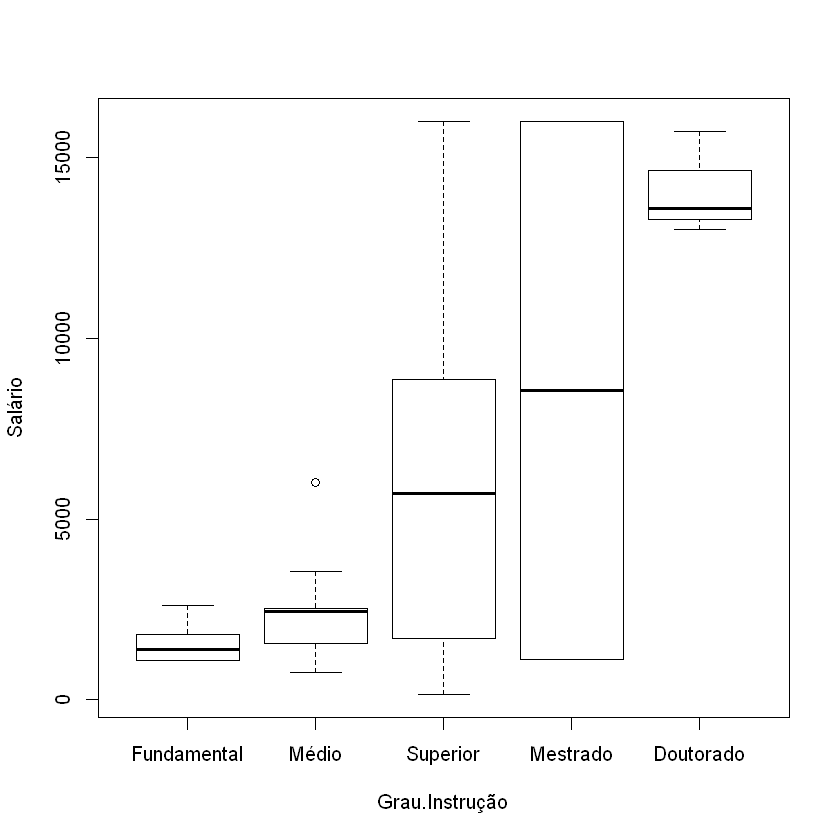

In [21]:
boxplot(Salário ~ Grau.Instrução, data = dados_cliente)

In [22]:
print('Media')
with(dados_cliente, tapply(Salário, Grau.Instrução, mean))
print('Desvio Padrão')
with(dados_cliente, tapply(Salário, Grau.Instrução, sd))
print('Quartil')
with(dados_cliente, tapply(Salário, Grau.Instrução, quantile))

[1] "Media"


Fundamental       Médio    Superior    Mestrado   Doutorado 
   1516.818    2410.308    6132.857    8552.500   14100.000

[1] "Desvio Padrão"


Fundamental       Médio    Superior    Mestrado   Doutorado 
   489.9095   1340.6645   5604.3995  10530.9413   1425.1667

[1] "Quartil"


$Fundamental
  0%  25%  50%  75% 100% 
1100 1100 1385 1800 2600 

$Médio
  0%  25%  50%  75% 100% 
 759 1563 2445 2519 6000 

$Superior
     0%     25%     50%     75%    100% 
  147.0  1691.5  5700.0  8850.0 16000.0 

$Mestrado
      0%      25%      50%      75%     100% 
 1106.00  4829.25  8552.50 12275.75 15999.00 

$Doutorado
   0%   25%   50%   75%  100% 
13000 13295 13590 14650 15710

## Quantitativa X Quantitativa


In [23]:
head(dados_cliente)

Id,Estado.civil,Grau.Instrução,Qtde.Filhos,Salário,Anos,anos_trabalho,UF
1,solteiro,Fundamental,NA,1100,26,3,MG
2,casado,Doutorado,1,13000,32,7,RJ
3,casado,Fundamental,2,1100,36,5,SP
4,solteiro,Médio,NA,2500,30,10,RS
5,solteiro,Fundamental,NA,2000,40,7,SC
6,casado,Fundamental,1,2600,28,0,SP


In [24]:
## Classes de Idade (Anos)
grupo_idade <- with(dados_cliente, cut(Anos, breaks = quantile(Anos),include.lowest = TRUE))

fa_idade <- table(grupo_idade)

In [25]:
fa_idade

grupo_idade
  [19,30] (30,34.5] (34.5,40]   (40,48] 
       11         7        10         8 

In [26]:
## Quartis de salario
quantile(dados_cliente$Salário)

## Classificação de acordo com os quartis
grupo_sal <- cut(dados_cliente$Salário, breaks =  quantile(dados_cliente$Salário),include.lowest = TRUE)


0%      25%      50%      75%     100% 
  147.00  1145.75  2165.00  4095.00 16000.00

In [27]:
fa_sal <- table(grupo_sal)
fa_sal

grupo_sal
     [147,1.15e+03] (1.15e+03,2.16e+03]  (2.16e+03,4.1e+03]   (4.1e+03,1.6e+04] 
                  9                   9                   9                   9 

In [29]:
## Tabela combinada  cruzada
fa <- table(grupo_idade, grupo_sal)
fa

           grupo_sal
grupo_idade [147,1.15e+03] (1.15e+03,2.16e+03] (2.16e+03,4.1e+03]
  [19,30]                4                   1                  4
  (30,34.5]              0                   1                  3
  (34.5,40]              3                   3                  1
  (40,48]                2                   4                  1
           grupo_sal
grupo_idade (4.1e+03,1.6e+04]
  [19,30]                   2
  (30,34.5]                 3
  (34.5,40]                 3
  (40,48]                   1

In [30]:
frg <- prop.table(fa)
frg

frl <- prop.table(fa,margin=1)
frl

frc <- prop.table(fa,margin=2)
frc

           grupo_sal
grupo_idade [147,1.15e+03] (1.15e+03,2.16e+03] (2.16e+03,4.1e+03]
  [19,30]       0.11111111          0.02777778         0.11111111
  (30,34.5]     0.00000000          0.02777778         0.08333333
  (34.5,40]     0.08333333          0.08333333         0.02777778
  (40,48]       0.05555556          0.11111111         0.02777778
           grupo_sal
grupo_idade (4.1e+03,1.6e+04]
  [19,30]          0.05555556
  (30,34.5]        0.08333333
  (34.5,40]        0.08333333
  (40,48]          0.02777778

           grupo_sal
grupo_idade [147,1.15e+03] (1.15e+03,2.16e+03] (2.16e+03,4.1e+03]
  [19,30]       0.36363636          0.09090909         0.36363636
  (30,34.5]     0.00000000          0.14285714         0.42857143
  (34.5,40]     0.30000000          0.30000000         0.10000000
  (40,48]       0.25000000          0.50000000         0.12500000
           grupo_sal
grupo_idade (4.1e+03,1.6e+04]
  [19,30]          0.18181818
  (30,34.5]        0.42857143
  (34.5,40]        0.30000000
  (40,48]          0.12500000

           grupo_sal
grupo_idade [147,1.15e+03] (1.15e+03,2.16e+03] (2.16e+03,4.1e+03]
  [19,30]        0.4444444           0.1111111          0.4444444
  (30,34.5]      0.0000000           0.1111111          0.3333333
  (34.5,40]      0.3333333           0.3333333          0.1111111
  (40,48]        0.2222222           0.4444444          0.1111111
           grupo_sal
grupo_idade (4.1e+03,1.6e+04]
  [19,30]           0.2222222
  (30,34.5]         0.3333333
  (34.5,40]         0.3333333
  (40,48]           0.1111111

In [31]:
head(dados_cliente)

Id,Estado.civil,Grau.Instrução,Qtde.Filhos,Salário,Anos,anos_trabalho,UF
1,solteiro,Fundamental,NA,1100,26,3,MG
2,casado,Doutorado,1,13000,32,7,RJ
3,casado,Fundamental,2,1100,36,5,SP
4,solteiro,Médio,NA,2500,30,10,RS
5,solteiro,Fundamental,NA,2000,40,7,SC
6,casado,Fundamental,1,2600,28,0,SP


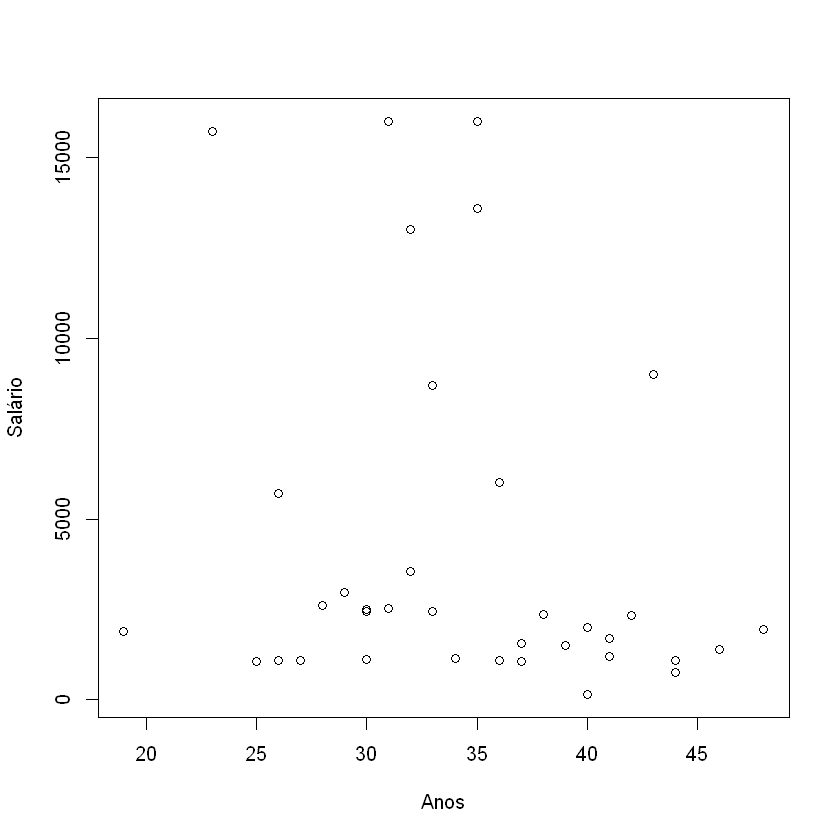

In [37]:
# Plotar gráfico de dispersão entre as variáveis

#plot(x = dados_cliente$Anos, y = dados_cliente$Salário)
plot(Salário ~ Anos, data = dados_cliente)

In [40]:
#Coeficiaente de relação
print('Coeficiaente de relação Pearson')
with(dados_cliente, cor(Anos, Salário)) #Pearson

print('Coeficiaente de relação kendall')
with(dados_cliente, cor(Anos, Salário, method = "kendall"))

print('Coeficiaente de relação spearman')
with(dados_cliente, cor(Anos, Salário, method = "spearman"))

[1] "Coeficiaente de relação Pearson"


[1] -0.2028986

[1] "Coeficiaente de relação kendall"


[1] -0.1595513

[1] "Coeficiaente de relação spearman"


[1] -0.2422661